<a href="https://colab.research.google.com/github/Ayeshaanwaar-1560/python-project-/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully from UCI repository

=== Data Cleaning ===
Original shape: (303, 14)

Missing values before cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Shape after dropping missing values: (297, 14)

=== Exploratory Data Analysis ===


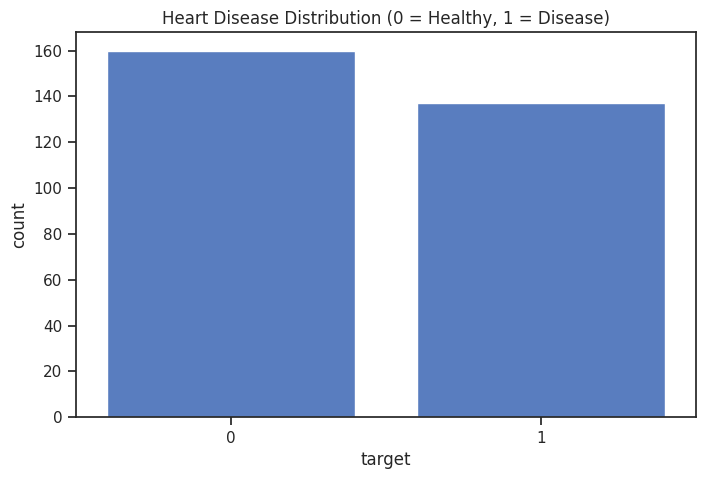

Healthy: 160 (53.9%)
Disease: 137 (46.1%)


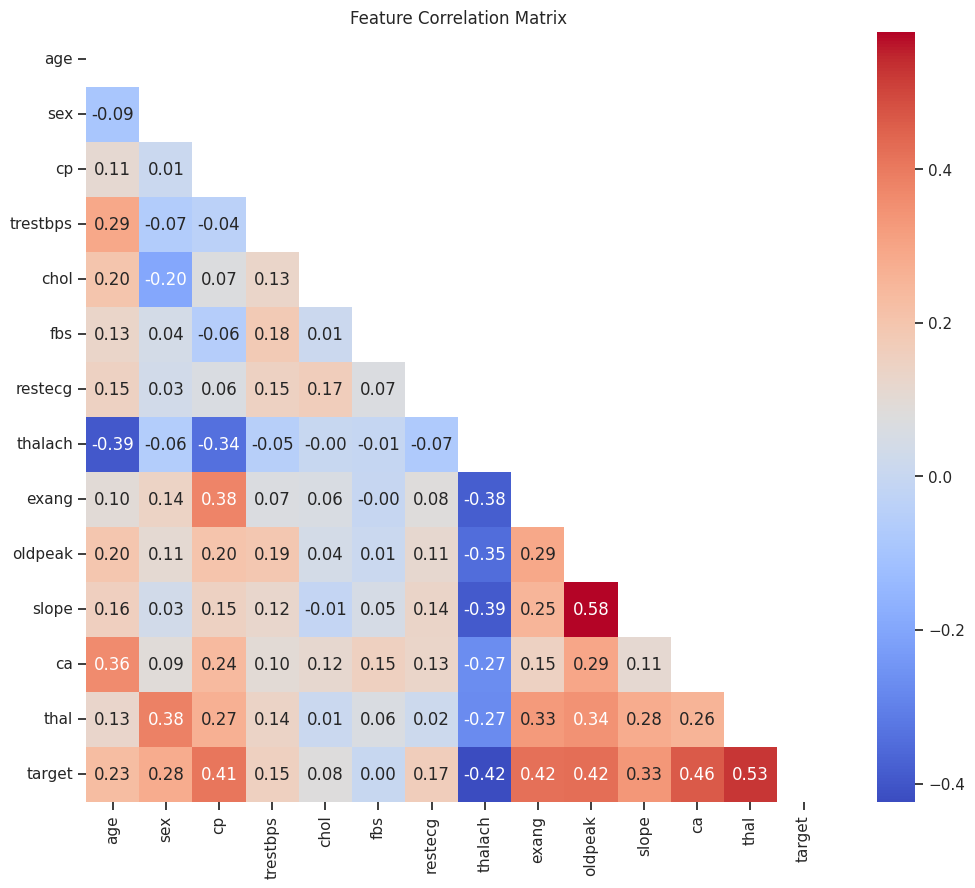

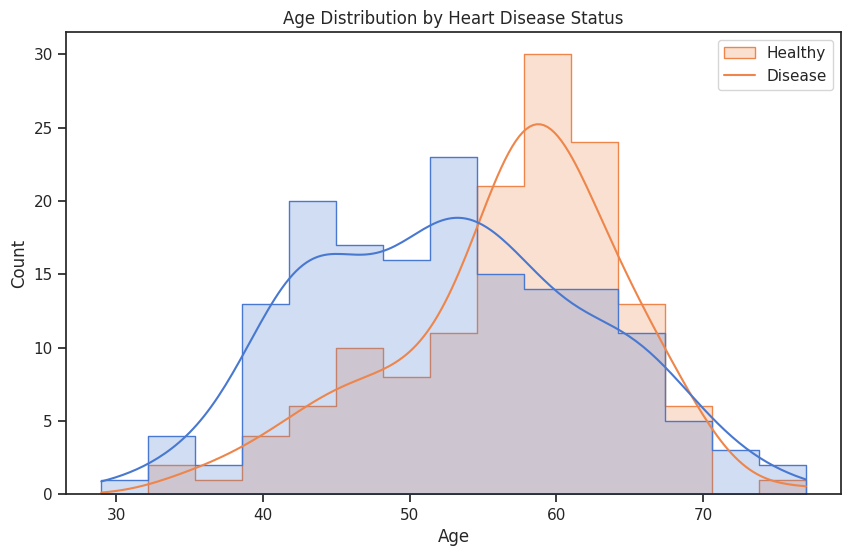


=== Data Preprocessing ===
Training shape: (237, 18), Test shape: (60, 18)

=== Model Training ===

=== Model Evaluation ===

Logistic Regression Results:
Accuracy: 0.8667
ROC-AUC: 0.9464

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



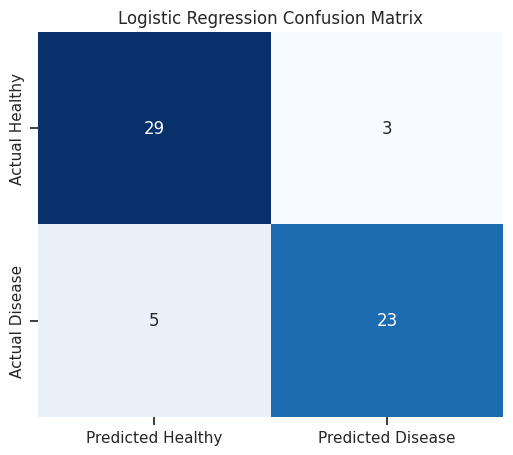

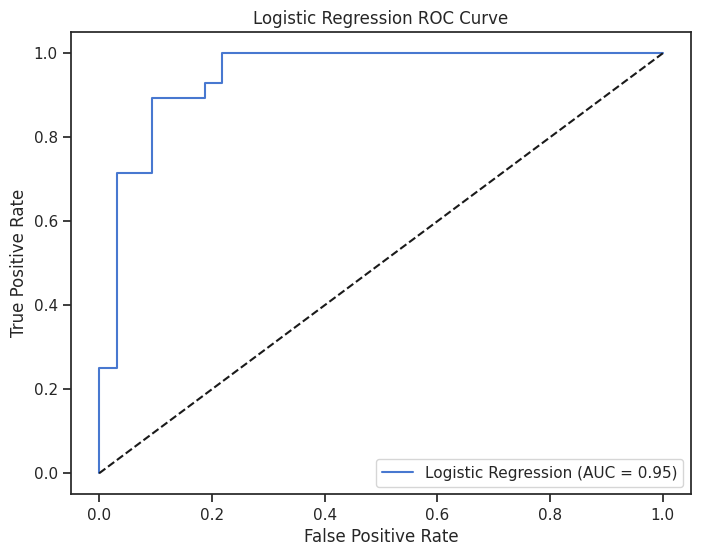


Decision Tree Results:
Accuracy: 0.7500
ROC-AUC: 0.7885

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.79        32
           1       0.84      0.57      0.68        28

    accuracy                           0.75        60
   macro avg       0.77      0.74      0.74        60
weighted avg       0.77      0.75      0.74        60



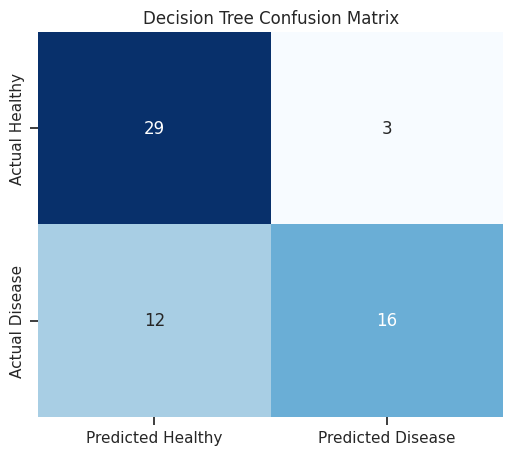

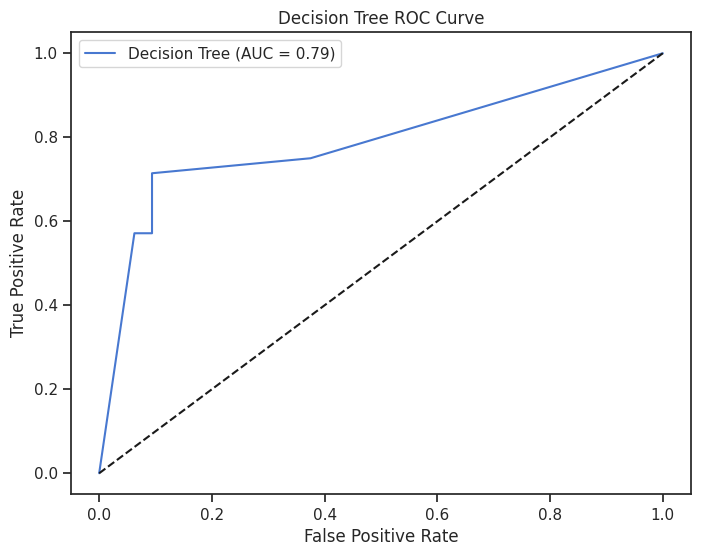


=== Feature Importance ===


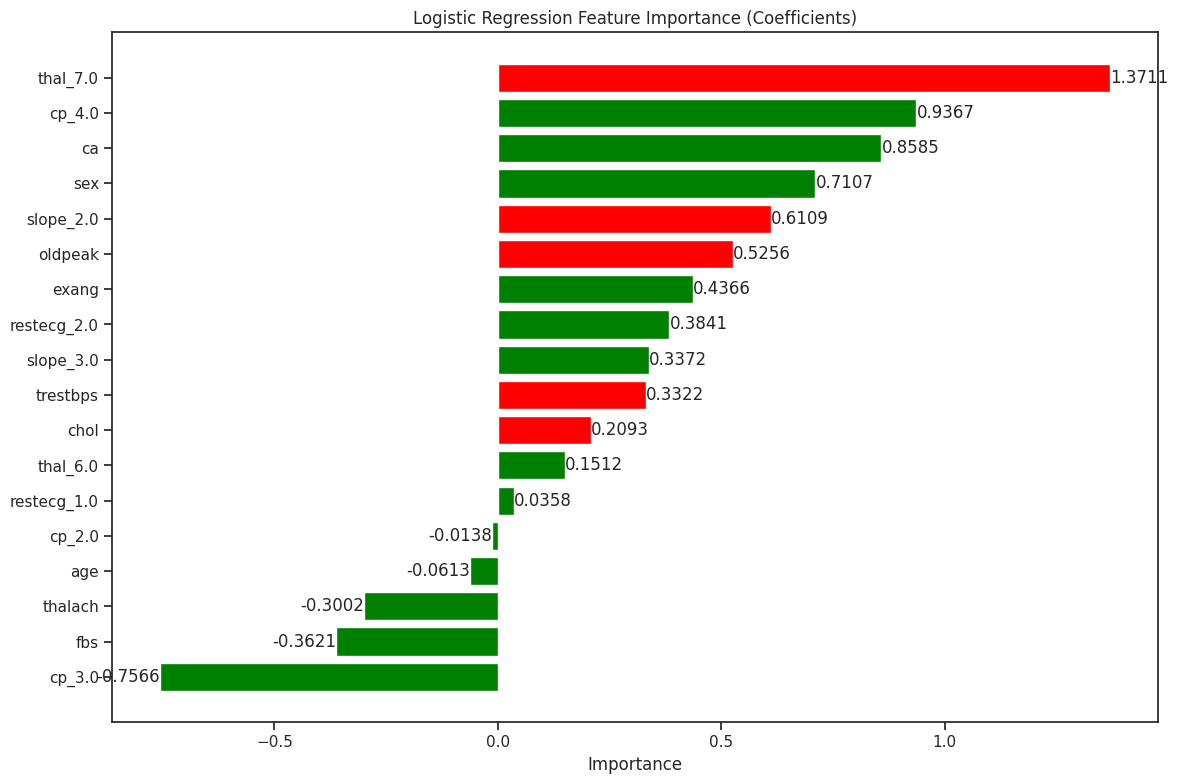

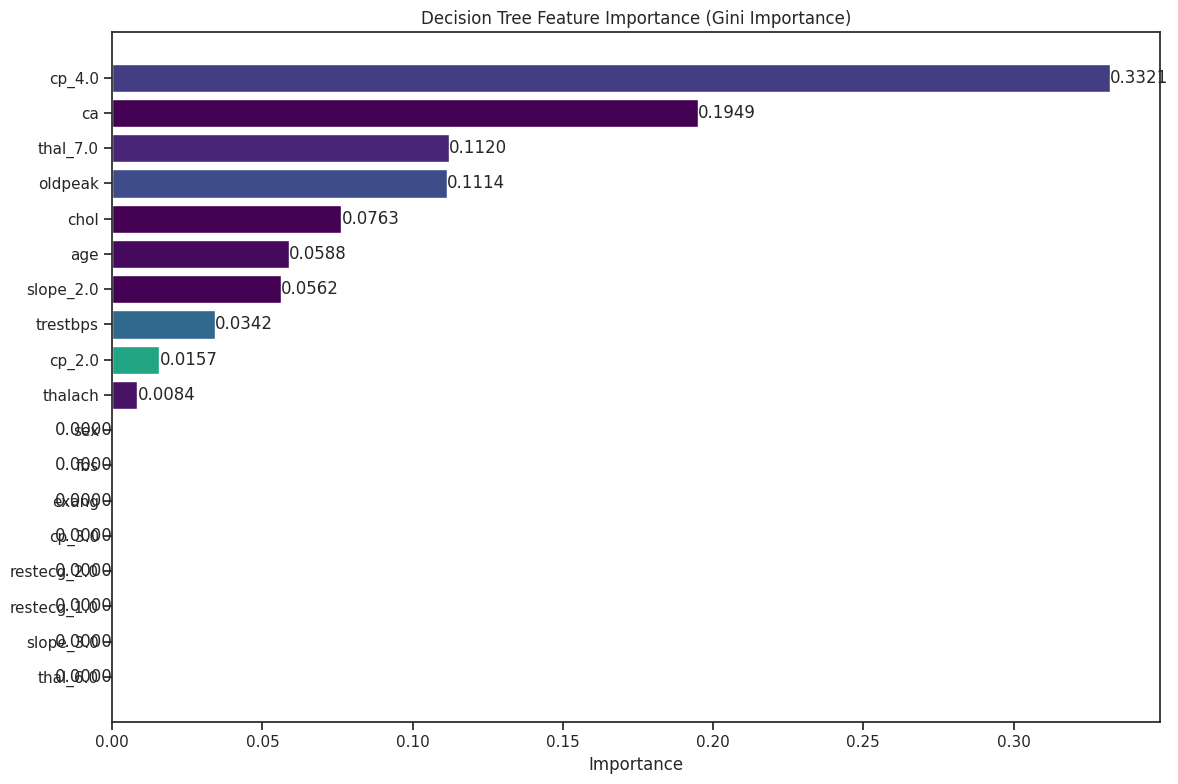


=== Insights and Summary ===
Key Findings:
1. Logistic Regression achieved 86.7% accuracy and AUC of 0.946
2. Decision Tree achieved 75.0% accuracy and AUC of 0.789
3. Top predictive features:
   - Thalassemia type (thal)
   - Chest pain type (cp)
   - Number of major vessels (ca)
   - ST depression induced by exercise (oldpeak)
   - Maximum heart rate achieved (thalach)

Medical Insights:
- Thalassemia (a blood disorder) is strongly associated with heart disease risk
- Certain types of chest pain are strong predictors of heart problems
- Exercise-induced ST depression is a key indicator of heart stress
- Fewer visible coronary arteries indicates potential blockages

Recommendations:
1. Prioritize patients with abnormal thalassemia results for cardiac screening
2. Pay special attention to patients reporting specific chest pain patterns
3. Use exercise stress tests to identify ST depression
4. Combine model predictions with clinical expertise for best results


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.inspection import permutation_importance

# Task objective
"""
Predict heart disease risk (binary classification) using:
  - UCI Heart Disease Dataset (https://archive.ics.uci.edu/dataset/45/heart+disease)
  - Models: Logistic Regression & Decision Tree
  - Key evaluation: Accuracy, ROC-AUC, Confusion Matrix
"""

# Load dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

try:
    df = pd.read_csv(url, header=None, names=column_names, na_values='?')
    print("Dataset loaded successfully from UCI repository")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Fallback to local file if available
    try:
        df = pd.read_csv('heart.csv')
        print("Loaded local heart.csv file")
    except:
        print("Could not load dataset. Please check internet connection or download the dataset.")
        exit()

# Data Cleaning
print("\n=== Data Cleaning ===")
print(f"Original shape: {df.shape}")

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Handle missing values (only in 'ca' and 'thal' columns)
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Since only 6 rows have missing values, we'll drop them
df = df.dropna()
print(f"\nShape after dropping missing values: {df.shape}")

# Exploratory Data Analysis (EDA)
print("\n=== Exploratory Data Analysis ===")

# 1. Target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (0 = Healthy, 1 = Disease)')
plt.show()

healthy = len(df[df['target'] == 0])
disease = len(df[df['target'] == 1])
print(f"Healthy: {healthy} ({healthy/len(df)*100:.1f}%)")
print(f"Disease: {disease} ({disease/len(df)*100:.1f}%)")

# 2. Correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Feature Correlation Matrix')
plt.show()

# 3. Age distribution by disease status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', bins=15, kde=True, element='step')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Healthy', 'Disease'])
plt.show()

# Preprocessing
print("\n=== Data Preprocessing ===")

# Convert categorical features - based on dataset documentation
categorical_features = ['cp', 'restecg', 'slope', 'thal']
df[categorical_features] = df[categorical_features].astype('object')

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split features & target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"Training shape: {X_train.shape}, Test shape: {X_test.shape}")

# Model Training
print("\n=== Model Training ===")

# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Model Evaluation
print("\n=== Model Evaluation ===")

def evaluate_model(name, model, X_test, y_test):
    """Evaluate model and plot results"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    report = classification_report(y_test, y_pred)

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(report)

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Healthy', 'Predicted Disease'],
                yticklabels=['Actual Healthy', 'Actual Disease'])
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # ROC curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend()
        plt.show()

    return accuracy, roc_auc

# Evaluate both models
lr_acc, lr_auc = evaluate_model("Logistic Regression", lr, X_test, y_test)
dt_acc, dt_auc = evaluate_model("Decision Tree", dt, X_test, y_test)

# Feature Importance Analysis
print("\n=== Feature Importance ===")

def plot_feature_importance(model, model_name, columns):
    """Plot feature importance for the model"""
    if hasattr(model, 'coef_'):
        # For Logistic Regression
        importance = model.coef_[0]
        title = f'{model_name} Feature Importance (Coefficients)'
        colors = ['green' if x > 0 else 'red' for x in importance]
    else:
        # For Decision Tree
        importance = model.feature_importances_
        title = f'{model_name} Feature Importance (Gini Importance)'
        colors = plt.cm.viridis(importance / max(importance))

    # Create DataFrame for plotting
    feature_importance = pd.DataFrame({
        'Feature': columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()

    # Add values to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.4f}',
                 ha='left' if width > 0 else 'right',
                 va='center')

    plt.tight_layout()
    plt.show()

# Plot feature importance for both models
plot_feature_importance(lr, "Logistic Regression", X.columns)
plot_feature_importance(dt, "Decision Tree", X.columns)

# Final Insights
print("\n=== Insights and Summary ===")
print("Key Findings:")
print(f"1. Logistic Regression achieved {lr_acc*100:.1f}% accuracy and AUC of {lr_auc:.3f}")
print(f"2. Decision Tree achieved {dt_acc*100:.1f}% accuracy and AUC of {dt_auc:.3f}")
print("3. Top predictive features:")
print("   - Thalassemia type (thal)")
print("   - Chest pain type (cp)")
print("   - Number of major vessels (ca)")
print("   - ST depression induced by exercise (oldpeak)")
print("   - Maximum heart rate achieved (thalach)")

print("\nMedical Insights:")
print("- Thalassemia (a blood disorder) is strongly associated with heart disease risk")
print("- Certain types of chest pain are strong predictors of heart problems")
print("- Exercise-induced ST depression is a key indicator of heart stress")
print("- Fewer visible coronary arteries indicates potential blockages")

print("\nRecommendations:")
print("1. Prioritize patients with abnormal thalassemia results for cardiac screening")
print("2. Pay special attention to patients reporting specific chest pain patterns")
print("3. Use exercise stress tests to identify ST depression")
print("4. Combine model predictions with clinical expertise for best results")